In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time
from math import fabs
from sklearn.metrics import confusion_matrix

In [2]:
while True:
    noise = np.random.randn(20, 2)
    
    cloud1 = noise
    cloud2 = noise + np.array([randint(-2, 2),randint(-2, 2)])

    X = np.vstack([cloud1, cloud2])

    annot1 = [0] * cloud1.shape[0]
    annot2 = [1] * cloud2.shape[0]

    y = annot1 +annot2

    data, labels = shuffle(X, y)

    test_size = int(len(data) * 0.5)
    Xtrain = data[:test_size]
    Ytrain = labels[:test_size]
    Xtest = data[test_size:]
    Ytest = labels[test_size:]

    clf = LogisticRegression()
    clf.fit(Xtrain, Ytrain)

    predictions = clf.predict(Xtest)

    break
accuracy_score(Ytest, predictions)

0.65

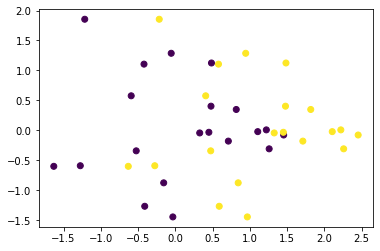

In [3]:
plt.scatter(X[:,0], X[:,1], c=y)

In [4]:
Xtrain

array([[-0.52447568, -0.3423412 ],
       [ 0.47927078,  0.40310864],
       [ 2.10693239, -0.02180415],
       [ 1.45072374, -0.03266326],
       [ 1.45470778, -0.07815256],
       [-0.63098069, -0.60094871],
       [ 0.81829113,  0.3481095 ],
       [ 0.58000727,  1.10505101],
       [ 1.47927078,  0.40310864],
       [ 2.26003451, -0.3088437 ],
       [-0.59183875,  0.57640037],
       [-1.27510655, -0.59092886],
       [ 1.81829113,  0.3481095 ],
       [ 0.32768156, -0.04356765],
       [ 0.84426992, -0.87653817],
       [-1.21554269,  1.85442648],
       [ 2.45470778, -0.07815256],
       [ 1.10693239, -0.02180415],
       [ 0.45072374, -0.03266326],
       [ 1.22229095,  0.00751993]])

In [5]:
Ytrain

[0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0]

In [6]:
dict = [[],[]]
i = 0 
for element in Xtrain:
    classs = Ytrain[i] # переменная classs нужна для того, чтобы каждый элемент знал в какой из подмассивов
                       # он отправится
    dict[classs].append(element) # здесь как раз сортируются координаты по соответствующим подмассивам
    i+=1

In [7]:
dict

[[array([-0.52447568, -0.3423412 ]),
  array([0.47927078, 0.40310864]),
  array([ 1.45470778, -0.07815256]),
  array([0.81829113, 0.3481095 ]),
  array([-0.59183875,  0.57640037]),
  array([-1.27510655, -0.59092886]),
  array([ 0.32768156, -0.04356765]),
  array([-1.21554269,  1.85442648]),
  array([ 1.10693239, -0.02180415]),
  array([ 0.45072374, -0.03266326]),
  array([1.22229095, 0.00751993])],
 [array([ 2.10693239, -0.02180415]),
  array([ 1.45072374, -0.03266326]),
  array([-0.63098069, -0.60094871]),
  array([0.58000727, 1.10505101]),
  array([1.47927078, 0.40310864]),
  array([ 2.26003451, -0.3088437 ]),
  array([1.81829113, 0.3481095 ]),
  array([ 0.84426992, -0.87653817]),
  array([ 2.45470778, -0.07815256])]]

In [8]:
# for i in dict[0]:
minX = dict[0][0][0]
maxX = dict[0][0][0]
for i in dict[0]:
    if i[0] < minX:
        minX = i[0]
for m in dict[0]:
    if m[0] > maxX:
        maxX = m[0]
print(minX, maxX)

-1.2751065547390403 1.4547077813537679


In [9]:
def check (minX, maxX, lst):
    lessmin = []
    moremin = []
    lessmax = []
    moremax = []
    for element in lst:
        if element[0] < minX:
            lessmin.append(element)
        if element[0] > minX:
            moremin.append(element)
    for element in lst:
        if element[0] < maxX:
            lessmax.append(element)
        if element[0] > maxX:
            moremax.append(element)
    return (lessmin, moremin, lessmax, moremax)

In [10]:
f = 0.00000001
lx0, mx0, lx1, mx1 = check (minX, maxX, Xtrain)
lx0 = len(lx0) + f
mx0 = len(mx0) + f
lx1 = len(lx1) + f
mx1 = len(mx1) + f

In [11]:
lx0, mx0, lx1, mx1

(1e-08, 19.00000001, 14.00000001, 5.00000001)

In [12]:
cl0 = 0
cl1 = 0
for e in Ytrain:
    
    if e == 0:
        cl0+=1
    if e == 1:
        cl1+=1
print(cl0,cl1)

11 9


In [13]:
mincl = mx0/len(Ytrain)
maxcl = lx1/len(Ytrain)
truecl = cl0/len(Ytrain)

In [14]:
maxcl

0.7000000005

In [15]:
def T():
    minres = fabs(truecl - mincl)
    maxres = fabs(truecl - maxcl)
    if minres < maxres:
        return (minX, 0)
    else:
        return (maxX, 1)

In [16]:
trainfin, hlp = T()
trainfin

1.4547077813537679

In [17]:
def predict(x, hlp, lst):
    pred = []
    for element in lst:
        if hlp == 0:
            if element[0] > x:
                pred.append(element[0])
        if hlp == 1:
            if element[0] < x:
                pred.append(element[0])
    return pred

In [18]:
leng = len(predict(trainfin, hlp, Xtest))

In [19]:
leng

17